In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #for visualization


In [2]:
data=pd.read_csv("/content/Book1.csv")

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


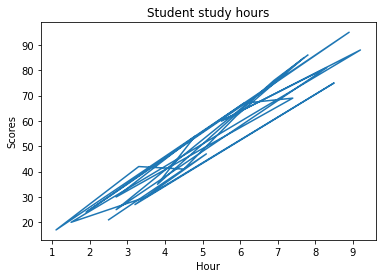

In [9]:
plt.plot(data.Hours, data.Scores)
plt.xlabel('Hour')
plt.ylabel('Scores')
plt.title('Student study hours')
plt.show()


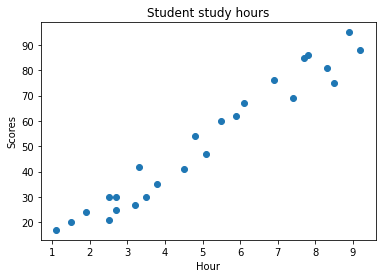

In [10]:
plt.scatter(x=data.Hours, y=data.Scores)
plt.xlabel('Hour')
plt.ylabel('Scores')
plt.title('Student study hours')
plt.show()

As you can see that there is no any outlier and null value and dependent variable are depend on independent variable so we use linear regression model in this dataset

In [11]:
y=data.drop('Scores', axis=1)
x=data.drop('Hours', axis=1)
print("value of x:",x.shape)
print("value of y:",y.shape)

value of x: (25, 1)
value of y: (25, 1)


In [13]:
x

,Scores
0,21
1,47
2,27
3,75
4,30
5,20
6,88
7,60
8,81
9,25


In [14]:
y


,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [15]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (20, 1) (20, 1)
Testing set shape: (5, 1) (5, 1)


In [16]:
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lr.predict(X_test)

In [17]:
from sklearn.metrics import mean_absolute_error

# Make predictions on the testing set
y_pred = lr.predict(X_test)

# Calculate the mean absolute error (MAE) of the predictions
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error:", mae)


Mean Absolute Error: 0.38902677412441233


In [23]:
lr.score(X_test,y_test)


0.9696127835594206

In [20]:
lr.coef_

array([[0.09802864]])

In [21]:
y_pred

array([[7.91556345],
       [2.91610289],
       [2.03384515],
       [7.42542025],
       [6.05301932]])

In [22]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["Hours", "Scores","student_marks_predicted"])


,Hours,Scores,student_marks_predicted
0,81.0,8.3,7.915563
1,30.0,2.5,2.916103
2,21.0,2.5,2.033845
3,76.0,6.9,7.425420
4,62.0,5.9,6.053019


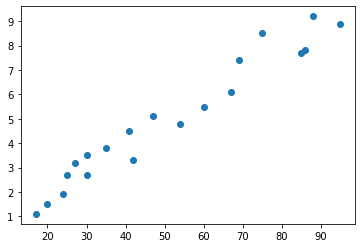

In [24]:
plt.scatter(X_train,y_train)

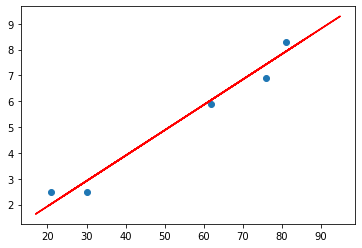

In [25]:
plt.scatter(X_test, y_test)
plt.plot(X_train, lr.predict(X_train), color = "r")

In [26]:
import joblib
joblib.dump(lr, "student_score_prediction.pkl")

['student_score_prediction.pkl']

In [32]:
import joblib
import numpy as np

# Load the saved model from the file
model = joblib.load("student_score_prediction.pkl")

model.predict([[5]])[0][0]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.4653869328038633